In [106]:
# %load ICAO Flight Accident Data Visualisation.py
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [107]:
# Load files
data = pd.read_excel('AccidentsData.xlsx', sheet_name = "PassengerNumbers", engine='openpyxl')
data_departs = pd.read_excel("AccidentsData.xlsx",sheet_name = "Departures",engine = 'openpyxl')
data_accident = pd.read_excel("AccidentsData.xlsx",sheet_name = "AccidentsClean",engine = 'openpyxl')
monthly_passengers = pd.read_excel("AccidentsData.xlsx",sheet_name = "MonthlyPassengers",engine = 'openpyxl')
flights_day = pd.read_excel("AccidentsData.xlsx",sheet_name = "FlightsByDay",engine = 'openpyxl')
operator_flights = pd.read_excel("AccidentsData.xlsx",sheet_name = "OperatorRisk",engine = 'openpyxl')
deps = pd.read_excel("AccidentsData.xlsx",sheet_name = "WBDepsReg",index_col = 0,engine = 'openpyxl')
gdp_cap = pd.read_excel("AccidentsData.xlsx",sheet_name = "GDP per Capita",engine = 'openpyxl')
income_cat = pd.read_excel("AccidentsData.xlsx",sheet_name = "WorldBankIncome",engine = 'openpyxl')
fleet_age = pd.read_excel("AccidentsData.xlsx",sheet_name = "OperatorRisk",engine = 'openpyxl')

In [108]:
# GLOBAL PASSENGERS

# Create data sets of interest
df1 = data.drop(columns = ['1960',"1961","1962","1963","1964","1965","1966","1967","1968","1969","2020"],axis = 1)
world = df1[df1["Country Name"] == "World"]
LA = df1[df1["Country Name"] == "Latin America & Caribbean"]
EA = df1[df1["Country Name"] == "East Asia & Pacific"]
E =  df1[df1["Country Name"] == "Europe & Central Asia"]
ME = df1[df1["Country Name"] == "Middle East & North Africa"]
NA = df1[df1["Country Name"] == "North America"]
SA = df1[df1["Country Name"] == "South Asia"]
SS = df1[df1["Country Name"] == "Sub-Saharan Africa"]

In [109]:
# Express as billions
def billions(df):
    df_new = pd.DataFrame(df.iloc[:,4:].sum(axis=0)/1000000000, 
                          columns = ["Passengers (billions)"])
    return df_new

# Run function
world_pass = billions(world)
LA_pass = billions(LA)
EA_pass = billions(EA)
E_pass = billions(E)
ME_pass = billions(ME)
NA_pass = billions(NA)
SA_pass = billions(SA)
SS_pass = billions(SS)

# Combine into one dataframe
combined_pass = pd.concat([LA_pass,EA_pass,E_pass,ME_pass,NA_pass,SA_pass,SS_pass],axis = 1)
combined_pass.columns = ["Latin America & Carribean","East Asia & Pacific","Europe & Central Asia", "Middle East & North Africa",
                   "North America", "South Asia", "Sub-Saharan Africa"]


In [110]:
# Figure 1 - Air Passenger Numbers By Region (1970-2020)

def global_pass():
    
    # Set variables
    X = np.arange(1970,2020)
    labels = ["East Asia & Pacific","Europe & Central Asia","North America","Rest of World"]
    eap = combined_pass["East Asia & Pacific"]
    nam = combined_pass["North America"] 
    eca = combined_pass["Europe & Central Asia"]
    row = combined_pass["Latin America & Carribean"] + combined_pass["Middle East & North Africa"] + combined_pass["South Asia"] + combined_pass["Sub-Saharan Africa"]

    # Plot chart
    fig, ax = plt.subplots(figsize = (8,4))
    pal = ["xkcd:darkblue",'xkcd:deep sea blue','steelblue','lightsteelblue']
    ax.yaxis.grid(True,linestyle = ":",color = "grey", alpha = 0.5)
    ax.stackplot(X,eap,eca,nam,row, labels = labels, colors = pal)
    ax.set_facecolor(color = "white")
    
    # Titles, axes and annotations
    ax.set_title("Global Air Passengers (1970 to 2019)")
    ttl = ax.title
    ttl.set_position([.5, 1.5])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels),loc = "upper center",facecolor = "white",
              frameon = False, prop = {'size':12}, bbox_to_anchor = (0.5,0.96))
    ax.set_xlim(1970,2019)
    yticks = ax.yaxis.get_major_ticks() 
    yticks[0].label1.set_visible(False)
    ax.set_xlabel("Year",fontsize = 12)
    ax.set_ylabel("Passengers (billions)",fontsize = 12)
    
    plt.show()


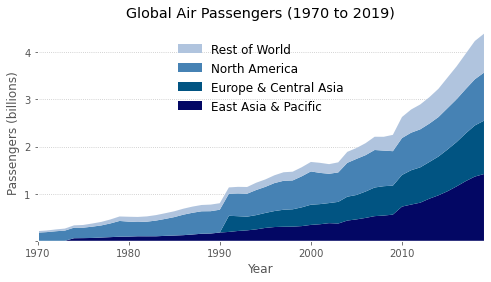

In [111]:
global_pass()

In [112]:
# DEPARTURES

# Set departures to millions
departs = data_departs.groupby("Year")["Departures"].sum()/1000000

# Figure 2 - Global Departures by Year (2008-2020)

def departures():
    
    # Set variables
    X = np.arange(2008,2021)
    
    # Plot chart
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize = (8,4))
    ax.set_facecolor(color = "white")
    ax.yaxis.grid(True,linestyle = ":",color = "grey", alpha = 0.5)
    ax.plot(X,departs, color = "gray",linewidth = 2)
    
    # Titles, axes and annotations
    ax.set_title("Flight Departures (2008-2020)")
    ax.set_ylim(15,45)
    ax.set_xlabel("Year",fontsize = 11,labelpad = 15)
    ax.set_ylabel("Number of flights (millions)",fontsize = 11)
    ax.text(2020.15,22,"22 mn")
    ax.text(2019.1,38,"38 mn")
    plt.show()

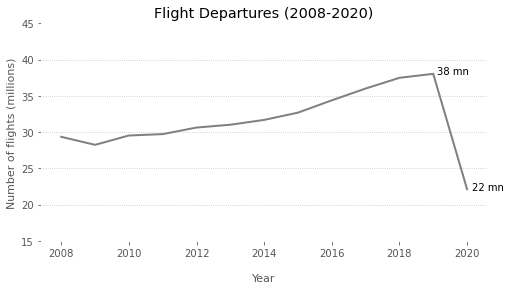

In [113]:
departures()

In [114]:
#   ACCIDENT DATA

# Set year as string and fill na with zero
data_accident.Year = data_accident.Year.astype('object')
data_accident["Fatalities"].fillna(0,inplace = True)  

# Filter to get commercial large plane data over 5.7 tonnes 
commercial = data_accident[(data_accident["Airplane"] == 1.0) & 
                           (data_accident["Over5700"] == 1.0) & 
                           (data_accident["Operator"] != "private") & (data_accident["ScheduledCommercial"] == 1.0)]

# Get incidents numbers and number of fatalities an put into dataframe
all_accidents = commercial.groupby("Year")["Date"].count()
fatal_accidents =commercial[commercial["Fatalities"] >0].groupby("Year")["Date"].count()
fatalities = commercial[commercial["Fatalities"]>0].groupby("Year")["Fatalities"].sum()
all_accidents_df = pd.concat([all_accidents,fatal_accidents,fatalities],axis = 1)
all_accidents_df.columns = ["Number Accidents","Accidents With Fatalities","Number Fatalities"]
all_accidents_df['Accidents No Fatalities'] = all_accidents_df['Number Accidents'] - all_accidents_df['Accidents With Fatalities']

# Group departures by year
departures_year = data_departs.groupby("Year",as_index = False)["Departures"].agg("sum")
departures_year.set_index('Year',inplace = True)

# Concat the departures to the incidents dataframe and express each accident measure over the same base of number of departures
accidents_per_departures = pd.concat([all_accidents_df,departures_year],axis = 1)
accidents_per_departures["Accidents_per_departures"] = accidents_per_departures["Number Accidents"]/accidents_per_departures["Departures"]*1000000
accidents_per_departures["Fatal_per_departures"] = accidents_per_departures["Accidents With Fatalities"]/accidents_per_departures["Departures"]*1000000
accidents_per_departures["Non_fatal_per_departures"] = accidents_per_departures["Accidents No Fatalities"]/accidents_per_departures["Departures"]*1000000
accidents_per_departures["Fatalities_per_departures"] = accidents_per_departures["Number Fatalities"]/accidents_per_departures["Departures"]*1000000
accidents_per_departures["% Fatal Accidents"] = round(accidents_per_departures["Accidents With Fatalities"]/accidents_per_departures["Number Accidents"]*100,0)


In [115]:
# Figure 3 - Air Accident Trends (2008-2020)

def accidents():
    
    # Set variables
    X = accidents_per_departures.index
    a = accidents_per_departures["Accidents_per_departures"]
    b = accidents_per_departures["Non_fatal_per_departures"]
    c = accidents_per_departures["Fatal_per_departures"] 
    
    # Plot Chart
    fig, ax = plt.subplots(figsize = (10,6))
    ax.plot(X,a, linewidth = 2,color = "xkcd:prussian blue")
    ax.plot(X,b, linewidth = 2, color = "slategrey")
    ax.plot(X,c, linewidth = 2, color = "firebrick")
    
    # Titles and Axes
    ax.set_title("Number of Accidents Per Million Flight Departures (2008 to 2020)", fontsize=15)
    ax.yaxis.grid(True,linestyle = ":",color = "grey")
    ax.set_xlabel("Year",fontsize = 13,labelpad = 15)
    ax.set_xlim(2008,2021)
    ax.set_yticks(np.arange(0, 9,1))
    ax.set_ylim(0,9)
    xticks = ax.xaxis.get_major_ticks() 
    yticks = ax.yaxis.get_major_ticks() 
    xticks[7].set_visible(False)
    yticks[0].label1.set_visible(False)
    ax.set_facecolor(color = "white")
    top = ax.spines["top"]
    right_side = ax.spines["right"]
    left_side = ax.spines["left"]
    right_side.set_visible(False)
    left_side.set_visible(False)
    top.set_visible(False)
    
    # Annotations
    plt.text(2020.10,0.3,"Fatal",fontsize = 12,color = "firebrick")
    plt.text(2020.10,3.1,"Non-Fatal",fontsize = 12,color = "slategrey")
    plt.text(2020.10,3.7,"All accidents",fontsize = 12,color = "xkcd:prussian blue")
    ax.set_ylabel("Accidents Per Million Departures",fontsize = 11)
    plt.show()

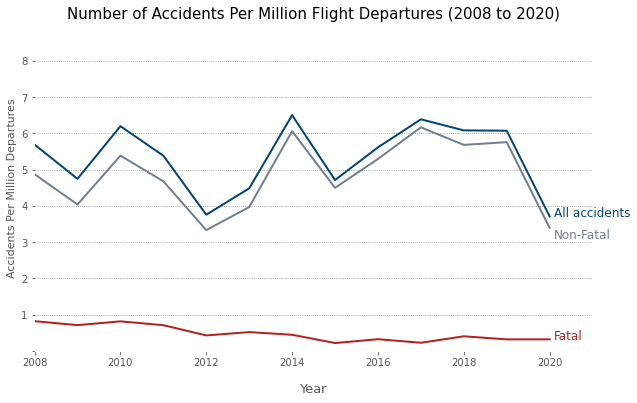

In [116]:
accidents()

In [117]:
# Figure 4 - Number of Fatalities by Year (2008-2020)

def fatalities():
    # Set variables
    X = all_accidents.index
    d = accidents_per_departures["Fatalities_per_departures"]
    d_mean = d.mean() # median and mean very similar
    color = ["lightsteelblue","lightsteelblue","lightsteelblue","lightsteelblue",
             "lightsteelblue","lightsteelblue","firebrick","lightsteelblue","lightsteelblue",
             "lightsteelblue","lightsteelblue","lightsteelblue","lightsteelblue"]
    
    # Plot chart
    fig, ax = plt.subplots(figsize = (10,6))
    ax.bar(X,d, color = color)
    ax.set_title("Number of Fatalities Per Million Departures (2008-2020)", fontsize=15)
    ax.set_facecolor(color = "white")
    ax.set_xlabel("Year",fontsize = 13,labelpad = 15)
    
    # Titles, Axes and Annotations
    ax.text(2019.75,16,"Average",fontsize = 10)
    ax.set_ylim(0,35)
    ax.axhline(y=d_mean, linewidth=1, linestyle = "--", color='slategrey')
    plt.xticks(accidents_per_departures.index,fontsize = 10)
    ax.set_ylabel("Number of Fatalities per Million Departures",fontsize = 10)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
    
    plt.show()

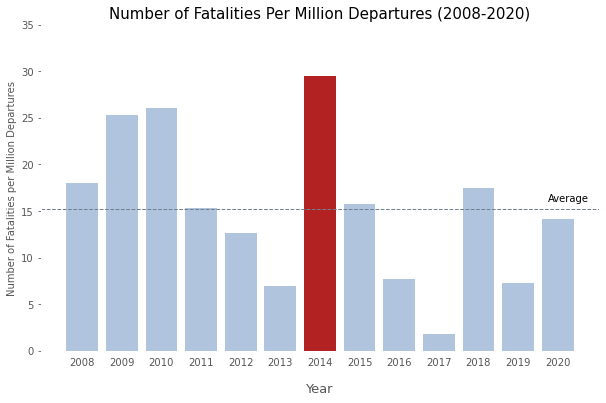

In [118]:
fatalities()

In [119]:
# Create dataframes where the fatalities were greater than 50 deaths and less than or equal to 50 deaths
above_50_fatalities = commercial[commercial["Fatalities"]>50]
below_50_fatalities = commercial[(commercial["Fatalities"]<=50) & (commercial["Fatalities"]>0)]

# Groupby year and concat to new dataframe - add in 2013 & 2017 > 50 deaths which was missed from the groupby as zero
above_50_df = above_50_fatalities.groupby("Year",as_index = False)["Fatalities"].count()
new_row1 = {'Year':2017,'Fatalities':0}
new_row2 = {'Year':2013,'Fatalities':0}
above_50_df = above_50_df.append(new_row1,ignore_index = True).sort_values(by = "Year")
above_50_df = above_50_df.append(new_row2,ignore_index = True).sort_values(by = "Year")
above_50_df.set_index("Year",inplace = True)
below_50_df = below_50_fatalities.groupby("Year",as_index = False)["Fatalities"].count()
below_50_df.set_index("Year",inplace = True)
combined_50 = pd.concat([below_50_df,above_50_df,accidents_per_departures["Departures"]],axis = 1)
combined_50.columns = ["<=50 deaths",">50 deaths","Departures"]
combined_50["<=50 per depart"] = combined_50["<=50 deaths"]/combined_50["Departures"]*1000000
combined_50[">50 per depart"] = combined_50[">50 deaths"]/combined_50["Departures"]*1000000
combined_50.columns = ["<=50 deaths",">50 deaths","Departures","<=50 per depart",">50 per depart"]
combined_50["Total Number Fatal"] = combined_50["<=50 deaths"] + combined_50[">50 deaths"]


In [120]:
# Figure 5 - Fatal Accidents Involving More or Less Than 50 Fatalities (2008-2020)

def above_50():
    # Set variables
    X = combined_50.index
    f = combined_50["<=50 per depart"]
    g = combined_50[">50 per depart"]
    h = f+g
    width = 0.75
    z = np.polyfit(X,h,1)
    p = np.poly1d(z)
    
    # Plot chart
    fig, ax = plt.subplots(figsize = (11,6))
    ax.set_facecolor(color = "white")
    ax.bar(X,f,width, color = "slategrey")
    ax.bar(X,g,width,color = "lightsteelblue",bottom = f)
    ax.plot(X,p(X),"black",linestyle = ":")
    
    # Titles and Axes
    ax.set_ylabel("Number of Fatalities per Million Departures", fontsize = 9)
    ax.set_xlabel("Year",fontsize = 13,labelpad = 15)
    ax.set_xticks(X)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
    ax.set_ylim(0,1.5)
    ax.set_title("Number of Fatal Accidents Over and Under 50 Deaths\n expressed per Million Departures (2008-2020)",fontsize = 13)
    custom_lines = [Line2D([0], [1], color="lightsteelblue", lw=10),
                   Line2D([0], [1], color="slategrey", lw=10)]   
    
    ax.legend(custom_lines, ["Accidents of More Than 50 Fatalities","Accidents of 50 or Less Fatalities"],
              facecolor = "white",frameon = False,bbox_to_anchor=(1,0.80),fontsize = 12)
     
    plt.show()

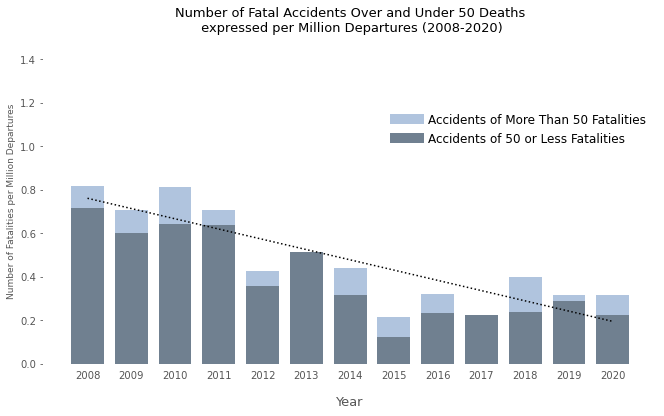

In [121]:
above_50()

In [122]:
# WHEN DO ACCIDENTS OCCUR?

# Get average monthly passenger totals
monthly_passenger_totals = pd.DataFrame(monthly_passengers.groupby("Month",as_index = False)["Total_OS"].sum()).set_index("Month")
monthly_passenger_totals.columns = ["Av_passengers"]
monthly_passenger_totals["Av_passengers(million)"] = monthly_passenger_totals["Av_passengers"]/1000000
pd.options.mode.chained_assignment = None

# Tidy data and extract months and days from the timestamp column for accidents
commercial.Date = commercial.Date.apply(lambda x: x.replace('"', ''))
commercial["Date"] = commercial["Date"].apply(lambda x: pd.Timestamp(x))
commercial["Month"] = commercial["Date"].apply(lambda x: x.month)
commercial["Dayofweek"] = commercial["Date"].apply(lambda x: x.dayofweek)

# Create monthly dataframes for total and fatal accidents
month = pd.DataFrame(commercial.groupby("Month").count())
fatal_month = pd.DataFrame(commercial[commercial["Fatalities"]>0].groupby("Month")["Date"].count())


In [123]:
# Figure 6 - Total and Fatal Accidents by Month

def mon():
   # Set variables
    x = np.arange(len(month.index))
    labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    m = month["Date"]/monthly_passenger_totals["Av_passengers(million)"]
    fm = fatal_month["Date"]/monthly_passenger_totals["Av_passengers(million)"]
    
    # Plot chart
    fig, (ax1,ax2) = plt.subplots(2,sharex = True,figsize = (10,6))
    fig.suptitle("Total and Fatal Accidents Per Million Passengers By Month (2008 - 2020)", fontsize = 12)
    
    # Plot first chart
    ax1.bar(x,m, label='Total Accidents',color = "lightsteelblue")
    ax1.set_facecolor("white")
    ax1.set_ylim(0,100)
    ax1.xaxis.grid(False)
    ax1.yaxis.grid(True,linestyle = ":",color = "grey")
    ax1.legend(loc = "upper right",fontsize = 13,facecolor = "white",frameon = False,bbox_to_anchor=(1,1.05))
    ax1.tick_params(axis='x',bottom = False) 
    
    # Plot second chart
    ax2.bar(x,fm, label='Fatal Accidents',color = "slategrey")
    ax2.set_facecolor("white")
    ax2.set_yticks(np.arange(0, 10,2))
    ax2.set_ylim(0,10)
    ax2.xaxis.grid(False)
    ax2.yaxis.grid(True,linestyle = ":",color = "grey")
    ax2.set_xticks(x)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
    ax2.set_xticklabels(labels)
    ax2.legend(loc = "upper right",fontsize = 13,facecolor = "white",frameon = False,bbox_to_anchor=(1,1.05))
    ax2.set_xlabel("Month",fontsize = 11,labelpad = 15)
    fig.text(0.06, 0.5, 'Number of Accidents per Million Passengers', va='center', rotation='vertical')
    
    plt.show()

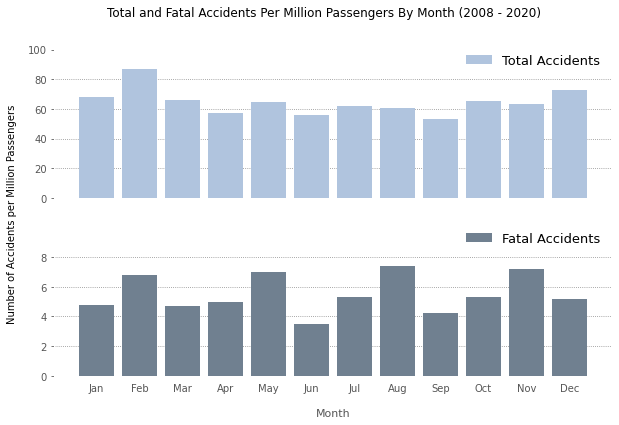

In [124]:
mon()

In [125]:
# Get the flight data for all accidents and fatal accidents by day of the week
flights = pd.DataFrame(flights_day.groupby("Day")["2019 Number of flights"].mean()).reset_index()
flights = pd.DataFrame(flights_day.groupby("Day")["2019 Number of flights"].mean()).reset_index()
flights.columns = ["Day_name","Flights 2019"]

# Label with daynames, get counts by day and merge with df of number of flights
day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
day = pd.DataFrame(commercial.Dayofweek.value_counts()).reset_index()
day.columns = ["Day_name","Accidents"]
day.Day_name = day_name
day_merged = day.merge(flights, on = "Day_name")
day_merged["Acc_per_000_flights"] = (day_merged["Accidents"]/day_merged["Flights 2019"])*1000
day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# Repeat above for fatal accidents
day_fatal = pd.DataFrame(commercial[commercial["Fatalities"]>0].groupby("Dayofweek")["Date"].count()).reset_index()
day_fatal["Day_name"] = day_name
day_fatal.drop(columns = "Dayofweek",inplace = True)
day_fatal.columns = ["Fatal Accidents","Day_name"]
day_fatal_merged = day_fatal.merge(flights, on = "Day_name")
day_fatal_merged["Fatal_per_000_flights"] = (day_fatal_merged["Fatal Accidents"]/day_merged["Flights 2019"])*1000

In [126]:
#Figure 7 - Total and Fatal Accidents by Weekday

def day():
    # Set variables
    x = [0,1,2,3,4,5,6]
    labels = ['Mon','Tues','Wed','Thur','Fri','Sat','Sun'] 
    fig, (ax1,ax2) = plt.subplots(2,sharex = True,figsize = (10,6))
    fig.suptitle("Total and Fatal Accidents Per 1000 Flights By Day of the Week (2008-2020)", fontsize = 12)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    d = day_merged["Acc_per_000_flights"]
    fd = day_fatal_merged["Fatal_per_000_flights"]
    
    # Plot first chart
    ax1.bar(x,d, label='Total Accidents',color = "lightsteelblue")
    ax1.set_facecolor("white")
    ax1.set_yticks(np.arange(0, 4,1))
    ax1.set_ylim(0,4)
    ax1.xaxis.grid(False)
    ax1.yaxis.grid(True,linestyle = ":",color = "grey")
    ax1.legend(loc = "upper right",fontsize = 13,facecolor = "white",frameon = False,bbox_to_anchor = (1,1.05))
    ax1.tick_params(axis='x',bottom = False) 
    
    # Plot second chart
    ax2.bar(x,fd, label='Fatal Accidents',color = "slategrey")
    ax2.set_facecolor("white")
    ax2.set_yticks(np.arange(0,0.5,0.2))
    ax2.set_ylim(0,0.5)
    ax2.yaxis.grid(True,linestyle = ":",color = "grey")
    ax2.set_xticks(x)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
    ax2.set_xticklabels(labels)
    ax2.legend(loc = "upper right",fontsize = 13,facecolor = "white",frameon = False,bbox_to_anchor = (1,1.05))
    ax2.set_xlabel("Day",fontsize = 11, labelpad = 15)
    fig.text(0.06, 0.5, 'Number of Accidents per Million Passengers', va='center', rotation='vertical')
    
    plt.show()

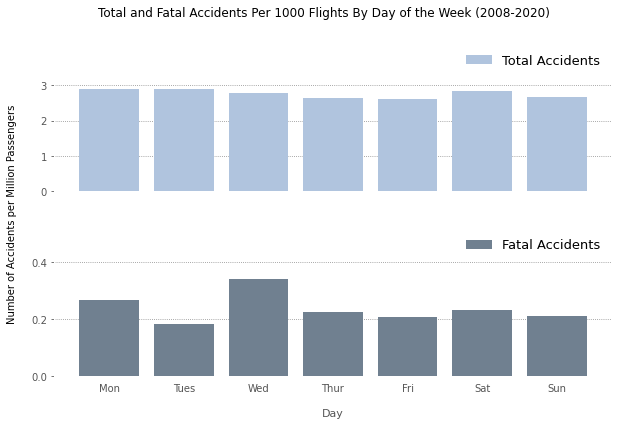

In [127]:
day()

In [128]:
# ACCIDENTS BY SIZE AND MODEL OF PLANE

# Dataframes of all accidents by size and model
plane_type = commercial[["Model","Size","EngineType","In Service","Year"]].reset_index()
planes_sort = pd.DataFrame(plane_type.groupby(["Model","In Service","Size"],as_index = False)["index"].count().sort_values(by = "index",ascending = False))
planes_sort.columns = ["Model","In Service","Size","Accidents"]
planes_sort["Accidents/InService"] = planes_sort["Accidents"]/planes_sort["In Service"]
planes_sorted = planes_sort.sort_values(by = "Accidents/InService",ascending = False)

# Dataframes of fatal accidents by size and model
plane_type_fatal = commercial[commercial["Fatalities"]>0].reset_index()
planes_sort_fatal = pd.DataFrame(plane_type_fatal.groupby(["Model","In Service","Size"],as_index = False)["index"].count().sort_values(by = "index",ascending = False))
planes_sort_fatal.columns = ["Model","In Service","Size","Accidents"]
planes_sort_fatal["Accidents/InService"] = planes_sort_fatal["Accidents"]/planes_sort_fatal["In Service"]
planes_sorted_fatal = planes_sort_fatal.sort_values(by = "Accidents/InService",ascending = False)

# Size of plane by total and fatal accidents
size_count_fatal = pd.DataFrame(planes_sort_fatal.Size.value_counts())
seats = pd.Series(["<25","25-49","50-349","350+"])
size_count = pd.DataFrame(planes_sort.Size.value_counts())
size_count.set_index(seats,inplace = True)
    

In [129]:
# Figure 8 - Total and Fatal Accidents by Size of Aircraft

def size():
   
    # Set variables
    labels1 = size_count.index[0:4]
    planes1 = size_count.Size[0:4]
    planes2 = size_count_fatal.Size[0:4]
    colors = ["slategrey","xkcd:steel blue","xkcd:light grey blue","grey"]
    explode = (0.05,0.05,0.05,0.05)
    
    # Plot chart
    fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,10))
    fig.suptitle("Total and Fatal Accidents By Plane Size", fontsize=18,y =0.88)
    ax1.pie(planes1, labels=['','','',''],autopct='%1.0f%%',startangle=45,colors = colors,pctdistance=0.85, explode = explode,
          textprops={'fontsize': 13, 'color':"white",'weight':'heavy'})
    
    # Chart 1
    ax1.set_title("Total Accidents",fontsize = 14, y = 0.8)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.add_artist(centre_circle)
    ax1.axis('equal')  
    legend1 = ax1.legend(loc = "center",labels = labels1,facecolor = "white",frameon = False,fontsize = 14,title = "Seats")
    plt.setp(legend1.get_title(),fontsize=14)
    plt.tight_layout()
    
    # Chart 2
    ax2.pie(planes2, labels=['','','',''],autopct='%1.0f%%',startangle=45,colors = colors,pctdistance=0.85, explode = explode,
          textprops={'fontsize': 13,'color':'white','weight':'heavy'})
    ax2.set_title("Fatal Accidents",fontsize = 14,y = 0.8)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax2.add_artist(centre_circle)
    ax2.axis('equal')  
    plt.tight_layout()
    
    plt.show()

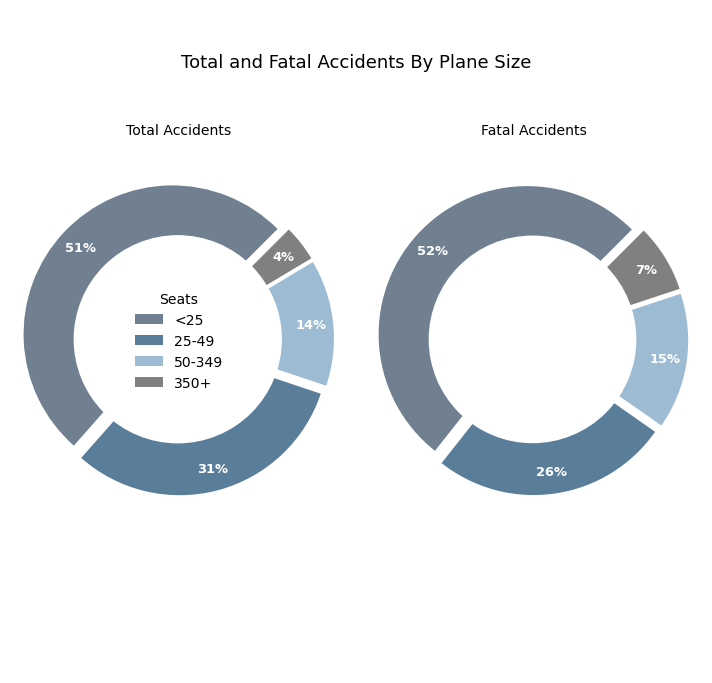

In [130]:
size()

In [131]:
# Figure 9 - Total Accidents By Plane Model

def model():
    # Set variables
    X1 = planes_sorted.Model.head(10)
    y1 = planes_sorted["Accidents/InService"].head(10)
    X2 = planes_sorted_fatal.Model.head(10)
    y2 = planes_sorted_fatal["Accidents/InService"].head(10)
    colour_list1 = ["slategrey","slategrey","slategrey","lightsteelblue","slategrey","steelblue","steelblue","slategrey","slategrey"]
    colour_list2 = ["slategrey","slategrey","lightsteelblue","slategrey","slategrey","slategrey","slategrey","slategrey","slategrey","slategrey"]
    
    # Plot chart
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,4))
    fig.subplots_adjust(wspace = 1,top = 0.8)
    fig.text(0.45, -0.05, 'Accidents per Number of Aircraft in Service', ha = "center",fontsize = 12)
    fig.suptitle("Total and Fatal Accidents By Model of Plane",fontsize = 14)
    
    
    # Chart 1
    ax1.barh(X1,y1,color = colour_list1)
    ax1.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
    ax1.invert_yaxis()
    ax1.set_facecolor("white")
    ax1.set_title("Total Accidents",fontsize = 11)
    
    custom_lines = [Line2D([0], [1], color="slategrey", lw=8),
                    Line2D([0], [1], color="steelblue", lw=8),
                    Line2D([0], [1], color="lightsteelblue", lw=8)
                    ]
                   
    legend1 = ax1.legend(custom_lines, ['Very Small/Small','Medium','Large'],facecolor = "white",frameon = False,
              bbox_to_anchor=(1.2,0.6),title = "Size of Aircraft", fontsize = 10)
    plt.setp(legend1.get_title(),fontsize=11)
    
    # Chart 2
    ax2.barh(X2,y2,color = colour_list2)
    ax2.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
    ax2.invert_yaxis()
    ax2.set_facecolor("white")
    ax2.set_title("Fatal Accidents",fontsize = 11)
    
    
    plt.show()
    

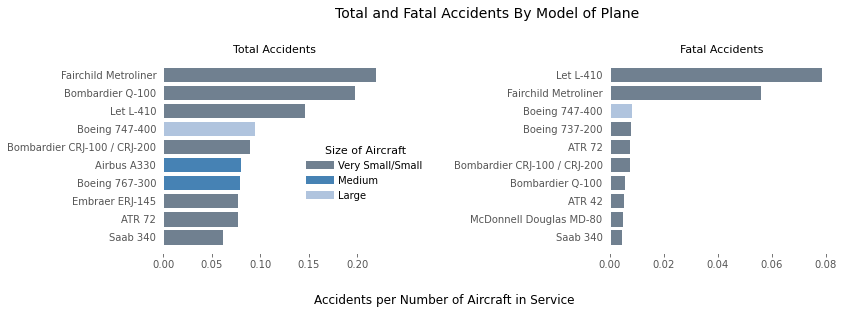

In [132]:
model()

In [133]:
# ACCIDENTS BY ENGINE TYPE

# Engine types for all accidents and fatal accidents
engine_type = commercial[["Model","EngineType","Year","In Service","Region"]].reset_index()
engine_accidents = pd.DataFrame(engine_type.groupby(["EngineType","Model","Year","In Service","Region"],as_index = False)["index"].count())
engine_accidents.columns = ["EngineType","Model","Year","In Service","Region","Accidents"]
engines = engine_accidents.sort_values(by = "Accidents",ascending = False)

engine_type_fatal = commercial[commercial["Fatalities"]>0]
engine_type_fatal = engine_type_fatal[["Model","EngineType","Year"]].reset_index()
engine_accidents_fatal = pd.DataFrame(engine_type_fatal.groupby(["EngineType","Model","Year"],as_index = False)["index"].count())
engine_accidents_fatal.columns = ["EngineType","Model","Year","Fatal"]
engines_fatal = engine_accidents_fatal.sort_values(by = "Fatal",ascending = False)

# By jet engines
jet_engines = pd.DataFrame(engines[engines["EngineType"] == "Jet"].groupby("Year")["Accidents"].sum()).reset_index()
jets_in_service = engine_accidents[engine_accidents["EngineType"] == "Jet"].groupby("Year",as_index = False)["In Service"].sum()
jet_engines= jet_engines.merge(jets_in_service)
jet_engines["Accidents/In Service/000"] = jet_engines["Accidents"]/jet_engines["In Service"]*1000

# jet engine fatal
jet_fatal = engines_fatal[engines_fatal["EngineType"] == "Jet"].groupby(["Year"])["Fatal"].sum().reset_index()
jet_fatal = jet_fatal.merge(jet_engines, on = "Year")
jet_fatal.drop(columns = ["Accidents","Accidents/In Service/000"],inplace = True)
jet_fatal["Fatal/In Service/000"] = jet_fatal["Fatal"]/jet_fatal["In Service"]*1000

# By turboprop engines
turbo_engines = pd.DataFrame(engines[engines["EngineType"] == "Turboprop"].groupby("Year")["Accidents"].sum()).reset_index()
turbo_in_service = engine_accidents[(engine_accidents["EngineType"] == "Turboprop") | (engine_accidents["EngineType"] == "Piston")].groupby("Year",as_index = False)["In Service"].sum()
turbo_engines = turbo_engines.merge(turbo_in_service)
turbo_engines["Accidents/In Service/000"] = turbo_engines["Accidents"]/turbo_engines["In Service"]*1000

# Turboprop fatal
turbo_fatal = engines_fatal[(engines_fatal["EngineType"] == "Turboprop")].groupby("Year")["Fatal"].sum().reset_index()
turbo_fatal = turbo_fatal.merge(turbo_engines, on = "Year")
turbo_fatal.drop(columns = ["Accidents","Accidents/In Service/000"],inplace = True)
turbo_fatal["Fatal/In Service/000"] = turbo_fatal["Fatal"]/turbo_fatal["In Service"]*1000

In [134]:
# Figure 10 - Total and Fatal Accidents by Engine Type

def engine():
    # Set variables
    years = ["2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
    num_years = len(years)
    jets = jet_engines["Accidents/In Service/000"]
    turbos = turbo_engines["Accidents/In Service/000"]
    jets_engines_fatal = jet_fatal["Fatal/In Service/000"]
    turbo_engines_fatal = turbo_fatal["Fatal/In Service/000"]
    pos = np.arange(num_years)+.5
    
    # Plot Chart
    fig = plt.figure(facecolor='white', edgecolor='none',figsize = (10,10))
    ax1 = fig.add_axes([0.05, 0.1, 0.35, 0.8])
    ax2 = fig.add_axes([0.6, 0.1, 0.35, 0.8])
    ax1.set_facecolor("white")
    ax2.set_facecolor("white")
    
    ax1.set_xticks(np.arange(0,5,1))
    ax2.set_xticks(np.arange(0,5,1))
    ax1.set_xlim(0,4)
    ax2.set_xlim(0,4)
    ax1.xaxis.set_ticks_position('top')
    ax2.xaxis.set_ticks_position('top')
    
    for loc, spine in ax1.spines.items():
        if loc!='right':
            spine.set_color('none') 
    
    for loc, spine in ax2.spines.items():
        if loc!='left':
            spine.set_color('none') 
    
    ax1.barh(pos,turbos, align='center',color = "lightsteelblue", edgecolor='None')
    ax1.barh(pos, turbo_engines_fatal, align='center', facecolor='slategrey',height=0.5, edgecolor='None')
    ax1.set_yticks([])
    ax1.xaxis.grid(True,linestyle = ":",color = "lightgrey")
    ax1.invert_xaxis()
    ax1.invert_yaxis()
    
    ax2.barh(pos, jets, align='center', color = "lightsteelblue",edgecolor='None')
    ax2.barh(pos, jets_engines_fatal, align='center', facecolor='slategrey',height=0.5, edgecolor='None')
    ax2.set_yticks([])
    ax2.xaxis.grid(True,linestyle = ":",color = "lightgrey")
    ax2.spines['left'].set_visible(True)
    ax2.invert_yaxis()
    
    transform = transforms.blended_transform_factory(fig.transFigure, ax2.transData)
    for i, label in enumerate(years):
        ax2.text(0.5, i+0.5, label, ha='center', va='center',transform=transform,fontsize = 14)
    
    # Titles and Legend
    ax2.set_title('Jets', x=0.05, y=1.05, fontsize=14)
    ax1.set_title('Turboprops', x=0.87, y=1.05, fontsize=14)
    fig.suptitle('Accidents per 1000 In Service\n(2008-2020)', x=0.95, y = 1,ha='right',fontsize = 14)
    labels = ["Total Accidents","Fatal Accidents"]
    ax2.legend(labels = labels,facecolor = "white",frameon = False,ncol = 1, loc = 'lower left',
               bbox_to_anchor=(0.5,0.8),fontsize = 13)
    
    plt.show()


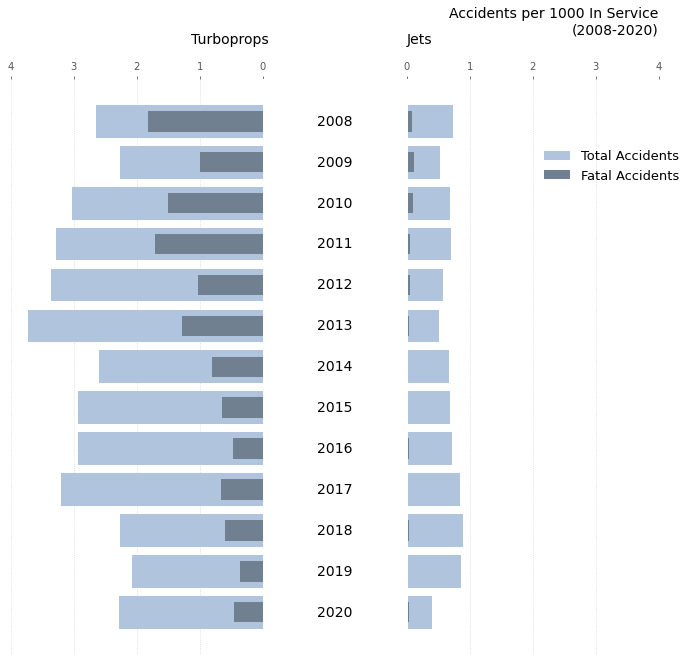

In [135]:
engine()

In [136]:
# ACCIDENTS BY FLIGHT STAGE

# find stage by total and fatal accidents
stage = pd.DataFrame(commercial.FlightPhase.value_counts()).reset_index()
stage.columns = ["Flight_phase","Number"]
fatal_stage =commercial[commercial["Fatalities"] >0].groupby("FlightPhase")["Date"].count().reset_index()
fatal_stage.columns = ["Flight_phase","Number"]
fatal_stage = fatal_stage.sort_values(by = "Number",ascending = False)
new_row = {'Flight_phase':"Tow",'Number':0}
fatal_stage = fatal_stage.append(new_row,ignore_index = True)

# Create combined categories to reduce complexity of data
stage['Flight_phase'] = stage['Flight_phase'].replace(['Tow','Manoeuvring'],'Manoeuvring')
fatal_stage['Flight_phase'] = fatal_stage['Flight_phase'].replace(['Tow','Manoeuvring'],'Manoeuvring')
stage['Flight_phase'] = stage['Flight_phase'].replace(['Initial Climb'],'Climb')
stage = stage[stage["Flight_phase"]!= "Unknown"]
fatal_stage['Flight_phase'] = fatal_stage['Flight_phase'].replace(['Initial Climb'],'Climb')
fatal_stage = fatal_stage[fatal_stage["Flight_phase"]!= "Unknown"]


In [137]:
# Figure 11 - Total and Fatal Accidents by Flight Stage

def stage_flight():
    # Set variables
    width = 0.5
    fig, ax = plt.subplots(figsize = (12,4),edgecolor = None)
    ax.set_facecolor(color = "white")
    
    # Plot chart
    ax.bar(stage.Flight_phase,stage.Number,width, color = "lightsteelblue")
    ax.bar(fatal_stage.Flight_phase,fatal_stage.Number,width,color = "slategrey")
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
    plt.xticks(fontsize=10 ) 
    ax.set_ylabel("Number", fontsize = 12)
    ax.set_yticks(np.arange(0, 1000, step=200))
    ax.set_ylim(0,900)
    ax.yaxis.grid(True,linestyle = ":",color = "grey")
    ax.set_title("Total and Fatal Accidents By Flight Phase",fontsize =15)
    ax.legend(labels = ["Total Accidents","Fatal Accidents"],facecolor = "white",frameon = False,
              bbox_to_anchor=(1,0.9),fontsize = 14)
    plt.show()

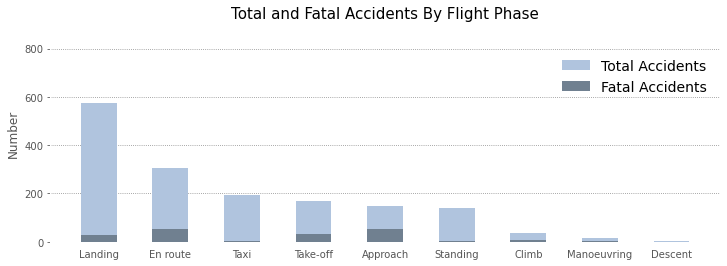

In [138]:
stage_flight()

In [139]:
# ACCIDENTS BY OPERATOR

# Get total accidents by operator
operator_flights = operator_flights[operator_flights['annual_flights']>0]
operator_flights = operator_flights[operator_flights['accidents_5y']>0]
operator_flights["Accident_rate"] = operator_flights["accidents_5y"]/operator_flights["annual_flights"]*1000
operator_flights = operator_flights.sort_values(by = "Accident_rate",ascending = False)

In [140]:
# Figure 12 - Total Accidents By Operator

def operator():
    # Set variables
    operator_top = operator_flights.head(10)
    operator_bot = operator_flights.tail(10)
    my_list = [0,1,2,3,4,5,6,7,8,9]
    labels1 = ["Buffalo Airways (CAN)","AirAsia (PHI)","Omni Air (USA)","Kalitta Air (USA)",
                 "Eagle Air (USA)","Blue Sky (KEN)","Jordan Aviation (JOR)","Lynden Air Cargo (USA)",
                 "West Wind Aviation (CAN)", "Buraq Air (LIB)"]
    
    labels2 = ["Qatar Airways (QAT)","Saudia Arabian Airlines (SAU)","Xiamen Airlines (CHN)","SkyWest Airlines (USA)",
             "Republic Airways (USA)","LATAM Airlines (BRA)","All Nippon Airways (JPN)","Lufthansa (GER)",
             "Air China (CHN)","China Eastern (CHN)"]
    
    # Plot charts
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,4))
    plt.suptitle("Total and Fatal Accident Rates - Highest and Lowest Ten (2016-2020)",fontsize = 14, x = 0.45,y = 1.1)
    plt.subplots_adjust(hspace=0.1,wspace = 1)
    fig.text(0.45, -0.09, 'Number of Accidents per 1000 Flights', ha='center',fontsize = 13)
    
    # Chart 1
    ax1.set_facecolor("white")
    ax1.set_title("Highest Ten",fontsize = 10,pad = 15)
    ax1.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
    ax1.hlines(y = my_list,xmin = 0, xmax = operator_top['Accident_rate'],color = "#007acc",alpha = 0.2, linewidth = 8)
    ax1.xaxis.grid(True,linestyle = ":",color = "lightgrey")
    ax1.plot(operator_top["Accident_rate"],labels1,"o",markersize = 8, color = "#007acc",alpha = 0.6)
    ax1.spines['top'].set_visible(False)
    ax1.set_xticks(np.arange(0, 20,2))
    ax1.spines['left'].set_bounds(1,len(my_list))
    ax1.set_xlim(0,20)
    ax1.spines['left'].set_position(('outward',8))
    ax1.spines['bottom'].set_position(('outward',5))
    ax1.invert_yaxis()
    
    # Chart 2
    ax2.set_facecolor("white")
    ax2.hlines(y = my_list,xmin = 0, xmax = operator_bot['Accident_rate'],color = "#007acc",alpha = 0.2, linewidth = 8)
    ax2.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
    ax2.xaxis.grid(True,linestyle = ":",color = "lightgrey")
    ax2.plot(operator_bot["Accident_rate"],labels2,"o",markersize = 8, color = "#007acc",alpha = 0.6)
    ax2.set_title("Lowest Ten*",fontsize = 11,pad = 15)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_bounds(1,len(my_list))
    ax2.spines['left'].set_position(('outward',8))
    ax2.spines['bottom'].set_position(('outward',5))
        
    plt.show()

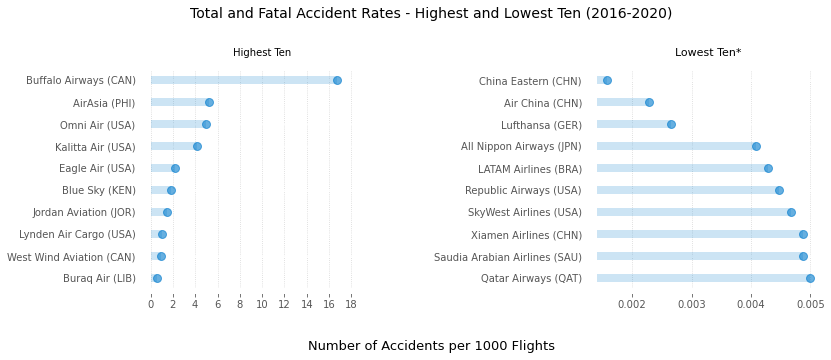

In [141]:
operator()

In [142]:
# Figure 13 - Fatal Accidents By Operator

# Fatal accidents by operator
operator_flights_fatal = operator_flights[operator_flights['fatalaccidents_5y']>0]
operator_flights_fatal["Accident_rate_fatal"] = operator_flights_fatal["fatalaccidents_5y"]/operator_flights["annual_flights"]*100000
operator_flights_fatal = operator_flights_fatal.sort_values(by = "Accident_rate_fatal",ascending = False)
operator_flights_fatal = operator_flights_fatal[2:]

In [143]:
def fatal_op():
    # Set variables
    my_list3 = list(range(0,len(operator_flights_fatal.operatorName)))
    labels3 = ["Air Sunshine (USA)","Air Niugina (PNG)",
             "Iran Aseman (IRN)","Pakistan Airlines (PAK)","Ural Airlines (RUS)","Egyptair (EGY)","Fly Dubai (UAE)",
             "Ethiopian Airlines (ETH)","Emirates Airline (UAE)","Aeroflot (RUS)","Lion Air (IDN)","Southwest Airlines (USA)"]
    
    # Plot charts
    fig, ax3 = plt.subplots(figsize = (10,6))
    
    # Chart 3
    ax3.set_facecolor("white")
    ax3.set_facecolor("white")
    ax3.hlines(y = my_list3,xmin = 0, xmax = operator_flights_fatal['Accident_rate_fatal'],color = "#007acc",alpha = 0.2, linewidth = 8)
    ax3.plot(operator_flights_fatal["Accident_rate_fatal"],labels3,"o",markersize = 8, color = "#007acc",alpha = 0.6)
    ax3.xaxis.grid(True,linestyle = ":",color = "lightgrey")
    ax3.invert_yaxis()
    
    # Titles and Axes
    ax3.set_title("Fatal Accidents per 1000 Flights (2016-2020)",fontsize = 12, pad = 20)
    ax3.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
    ax3.spines['top'].set_visible(False)
    ax3.set_xlabel("Number of Fatal Accidents per 1000 Flights")
    ax3.xaxis.labelpad = 25
    ax3.spines['left'].set_bounds(1,len(my_list3))
    ax3.spines['left'].set_position(('outward',8))
    ax3.spines['bottom'].set_position(('outward',5))
    ax3.set_xlim(0,5)
    ax3.set_xticks(np.arange(0,5,0.5))
    xticks = ax3.xaxis.get_major_ticks()
    xticks[9].set_visible(False)
        
    plt.show()

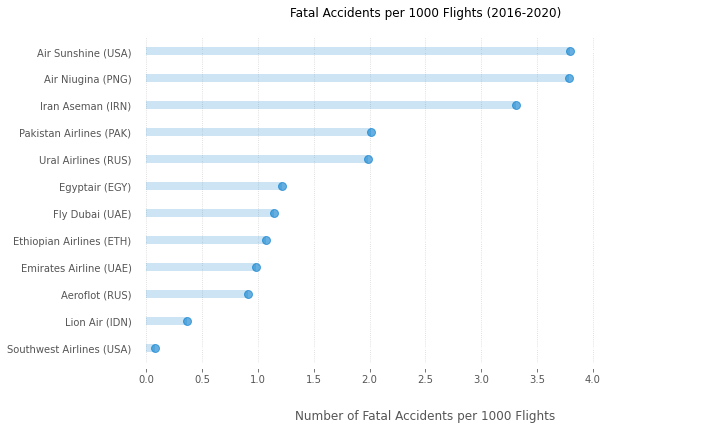

In [144]:
fatal_op()

In [145]:
# ACCIDENTS BY SAFETY CERTIFICATION

# Get certified operators
cert = operator_flights[operator_flights["is_iosa_certified"] == 1]
cert_rate = cert["accidents_5y"].sum()/cert["annual_flights"].sum()*1000000
cert_rate_fatal = cert["fatalaccidents_5y"].sum()/cert["annual_flights"].sum()*1000000

# Non Certified operators
non_cert = operator_flights[operator_flights["is_iosa_certified"] == 0]
non_cert_rate = non_cert["accidents_5y"].sum()/non_cert["annual_flights"].sum()*1000000
non_cert_rate_fatal = non_cert["fatalaccidents_5y"].sum()/non_cert["annual_flights"].sum()*1000000

In [146]:
# Figure 14 - Accident Rates by IOSA Certification

def safety():
    # Set variables
    y = ["Certified","Non-Certified"]
    rate = [cert_rate,non_cert_rate]
    fatal = [cert_rate_fatal,non_cert_rate_fatal]
    
    # Plot Chart
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,4))
    plt.suptitle("Total and Fatal Accident Rates By IOSA Certification (2016-2020)",fontsize = 14, x = 0.5,y = 1.1)
    plt.subplots_adjust(wspace = 0.5)
    
    ax1.bar(y,rate,color = "lightsteelblue")
    ax1.set_title("Total Accidents",fontsize = 10)
    ax1.yaxis.grid(True,linestyle = ":",color = "lightgrey")
    ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
    ax1.set_facecolor("white")
    ax1.set_ylabel("Accidents per Million Flights",fontsize = 10,labelpad = 10)
    ax1.set_xlabel("IOSA Status",fontsize = 10,labelpad = 10)
    
    ax2.bar(y,fatal,color = "slategrey")
    ax2.set_title("Fatal Accidents",fontsize = 10)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
    ax2.yaxis.grid(True,linestyle = ":",color = "lightgrey")
    ax2.set_facecolor("white")
    ax2.set_ylabel("Fatal Accidents per Million Flights",fontsize = 10,labelpad = 10)
    ax2.set_xlabel("IOSA Status",fontsize = 10,labelpad = 10)
    
    plt.show()

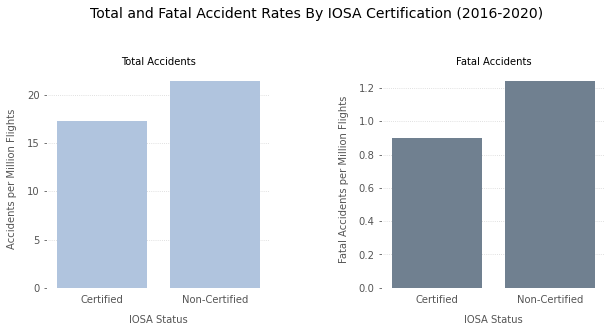

In [147]:
safety()

In [148]:
# ACCIDENTS BY STATE OF REGISTRATION

# Get incidents numbers and number of fatalities an put into dataframe
state = pd.DataFrame(commercial.groupby("StateOfRegistry",as_index = False)["Date"].count())
state.columns = ["State","Total_acc"]
fatal_state = pd.DataFrame(commercial[commercial["Fatalities"] >0].groupby("StateOfRegistry",as_index = False)["Date"].count())
fatal_state.columns = ["State","Fatal_acc"]
all_state = state.merge(fatal_state, how = "left",on = "State")
all_state["Fatal_acc"] = all_state["Fatal_acc"].fillna(0)
all_state["Acc_no_fat"] = all_state["Total_acc"] - all_state["Fatal_acc"]

# Departures by state
state_departures = data_departs.groupby("State",as_index = False)["Departures"].sum().sort_values(by = "Departures",
                                                                                                  ascending = False)                                                                                                                  
                                                                                              
# Merge the dataframes and create a new columns to show the accidents by state operator
state_combined = all_state.merge(state_departures,how = "left",on = "State")
state_combined["state_acc_thoudeps"] = (state_combined["Total_acc"]/state_combined["Departures"])*1000
state_combined["fatal_acc_thoudeps"] = (state_combined["Fatal_acc"]/state_combined["Departures"])*1000
   
# Extract best and worst states                                                                                                  
state_worst = state_combined.sort_values(by = "state_acc_thoudeps",ascending = False).head(10)
state_best = state_combined.sort_values( by = "state_acc_thoudeps",ascending = False)
state_best = state_best[state_best["state_acc_thoudeps"] > 0].tail(10)
fatal_worst = state_combined.sort_values(by = "fatal_acc_thoudeps",ascending = False).head(10)
fatal_best = state_combined.sort_values( by = "fatal_acc_thoudeps",ascending = False)
fatal_best = fatal_best[fatal_best["fatal_acc_thoudeps"] > 0].tail(10)

In [149]:
# Figure 15 - Total and Fatal Accident Rates by State of Registration

def by_state():
    # Set variables
    label1 = ["Sao Tome & Prin","Bermuda","Congo (DR)","Suriname","North Korea","Gambia","Cent.Afr.Rep","Guinea","Bhutan",
             "Sudan"]
    label2 = ["Japan","Sweden","Croatia","Chile","Spain","Oman","Finland","New Zealand","China","Italy"]
    label3 = ["Sao Tome & Prin", "Bermuda","Suriname","Congo (DR)","Georgia","Sudan","Somalia","Congo","Kyrgyzstan","Tajikistan"]
    label4 = ["Spain","India","Norway","Thailand","Brazil","USA","Germany","Australia","France","China"]
    
    # Plot charts
    fig, ax = plt.subplots(2,2,sharex = "col",figsize = (12,6))
    fig.text(0.45, 0.02, 'Accidents per Thousand Flights', ha='center',fontsize = 13)
    plt.suptitle("Ten Highest and Lowest Countries Total and Fatal Accidents (2008-2020)",fontsize = 15)
    plt.subplots_adjust(hspace=0.3,wspace = 0.25)
    
    ax[0,0].barh(label1,state_worst["state_acc_thoudeps"], align='center', color='lightsteelblue')
    ax[0,0].set_title("Highest Total Accident Rate",fontsize = 10)
    ax[0,0].set_facecolor("White")
    ax[0,0].xaxis.grid(True,linestyle = ":",color = "grey")
    ax[0,0].tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
    ax[0,0].invert_yaxis()
    
    ax[0,1].barh(label2, state_best["state_acc_thoudeps"], align='center', color='lightsteelblue')
    ax[0,1].tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
    ax[0,1].set_title("Lowest Total Accident Rate",fontsize = 10)
    ax[0,1].set_facecolor("White")
    ax[0,1].xaxis.grid(True,linestyle = ":",color = "grey")
    
    ax[1,0].barh(label3, fatal_worst["fatal_acc_thoudeps"], align='center', color='slategrey')
    ax[1,0].tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
    ax[1,0].set_title("Highest Fatal Accident Rate",fontsize = 10)
    ax[1,0].set_facecolor("White")
    ax[1,0].xaxis.grid(True,linestyle = ":",color = "grey")
    ax[1,0].invert_yaxis()
    
    ax[1,1].barh(label4, fatal_best["fatal_acc_thoudeps"], align='center', color='slategrey')
    ax[1,0].tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
    ax[1,1].set_title("Lowest Fatal Accident Rate for\n Countries With at Least One Fatal Accident*",fontsize = 10)
    ax[1,1].set_facecolor("White")
    ax[1,1].xaxis.grid(True,linestyle = ":",color = "grey")    
    
    plt.show()

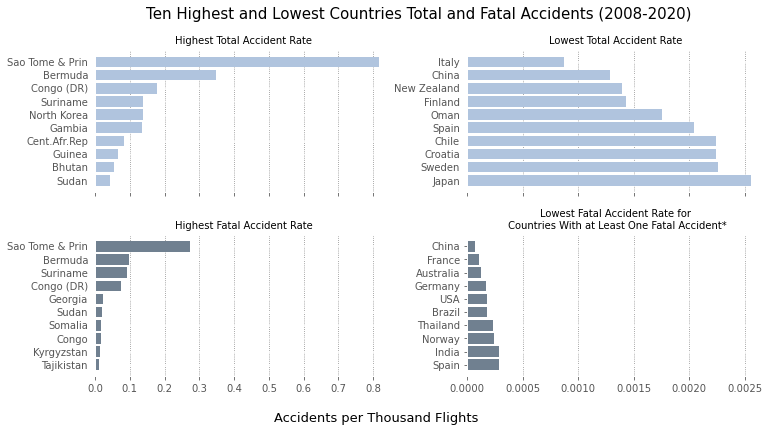

In [150]:
by_state()

In [151]:
# ACCIDENTS BY REGION of OCCURRENCE

# Put to millions departures
reg_deps = deps/1000000

# Get locations of accidents, drop ocean incidents and express per departures
locations = pd.DataFrame(commercial.groupby("Region",as_index = False)["Date"].count()).set_index("Region")
locations.drop(["Enroute/Oceans/Other"],axis = 0,inplace = True)
locations["Deps"] = reg_deps["Total"]
locations["Acc_deps"] = locations["Date"]/locations["Deps"]
locations.columns = ["Accidents","Deps","Acc_deps"]

# Repeat above for fatal accidents
locations_fatal = pd.DataFrame(commercial[commercial["Fatalities"]>0].groupby("Region",as_index = False)["Date"].count()).set_index("Region")
locations_fatal.drop(["Enroute/Oceans/Other"],axis = 0,inplace = True)
locations_fatal["Deps"] = reg_deps["Total"]
locations_fatal["Fat_deps"] = locations_fatal["Date"]/locations_fatal["Deps"]
locations_fatal.columns = ["Fatal","Deps","Fat_deps"]

In [152]:
# Figure 16 - Total and Fatal Accident Rates by Region of Occurrence

def region():
    labels = ['East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America', 'South Asia', 'Sub-Saharan Africa']
    accidents = locations.Acc_deps
    fatal = locations_fatal.Fat_deps
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots(figsize = (10,6))
    ax.barh(x + width/2, accidents, width, label='Total Accidents',color = "lightsteelblue")
    ax.barh(x - width/2, fatal, width, label='Fatal Accidents',color = "slategrey")
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_facecolor("White")
    ax.set_xlabel('Accidents per million departures',labelpad = 10)
    ax.set_title("Total and Fatal Accidents By Region (2008-2020)",fontsize = 13)
    ax.set_xlim(0,26)
    plt.yticks(fontsize=11) 
    ax.xaxis.grid(True,linestyle = ":",color = "grey")
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    ax.legend(fontsize = 13,facecolor = "white",frameon = False,bbox_to_anchor=(0.5,0.55))
    
    fig.tight_layout()
    
    plt.show()

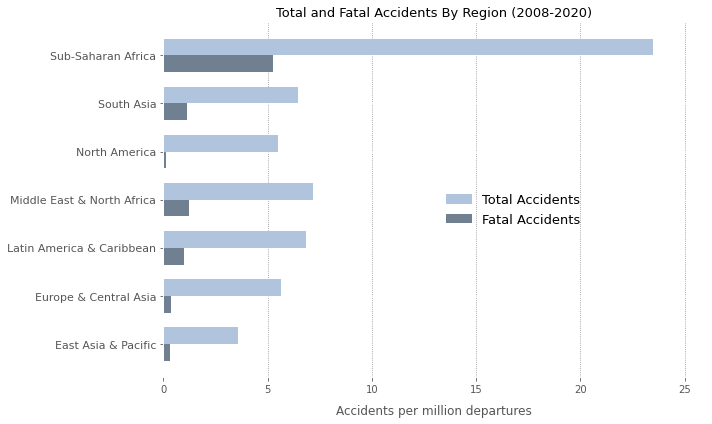

In [153]:
region()

In [154]:
# Get trend in total accidents over the period
# Group by region and year    
by_year = pd.DataFrame(commercial.groupby(["Region","Year"],as_index = False)["Date"].count())
by_year = by_year[by_year["Region"]!= 'Enroute/Oceans/Other'] 

# Function to get accidents per regional departures    
def trans(name):
    reg = by_year[by_year["Region"] == name][0:-1][:]
    reg["Acc"] = reg_deps.T[name][0:-1].tolist()
    reg["Acc_deps"] = reg["Date"]/reg["Acc"]
    mean_val = reg["Acc_deps"].mean()
    return reg,mean_val

EAP,EAP_mean = trans("East Asia & Pacific")
ECA,ECA_mean = trans("Europe & Central Asia")
LAC,LAC_mean = trans("Latin America & Caribbean")
MEN,MEN_mean = trans("Middle East & North Africa")
NA,NA_mean = trans("North America")
SA,SA_mean = trans("South Asia")
SSA,SSA_mean = trans("Sub-Saharan Africa")

In [155]:
# Figure 16 (b) - Accident Trend By Region of Occurrence
# Note this chart is combined with Figure 16 to produce one figure in the report.

def spark():
    # Set Variables
    def trans(name):
        reg = by_year[by_year["Region"] == name][0:][0:-1]
        reg["Acc"] = reg_deps.T[name][0:-1].tolist()
        reg["Acc_deps"] = reg["Date"]/reg["Acc"]
        mean_val = reg["Acc_deps"].mean()
        return reg,mean_val
       
    # Values
    EAP,EAP_mean = trans("East Asia & Pacific")
    ECA,ECA_mean = trans("Europe & Central Asia")
    LAC,LAC_mean = trans("Latin America & Caribbean")
    MEN,MEN_mean = trans("Middle East & North Africa")
    NA,NA_mean = trans("North America")
    SA,SA_mean = trans("South Asia")
    SSA,SSA_mean = trans("Sub-Saharan Africa")
    
    labels = EAP.Year
        
    # Plot Chart
    fig, axs = plt.subplots(7,1,figsize = (4,8))
    fig.suptitle("Total Accident Trend By Region (2008-2020)",fontsize = 12)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    
    axs[6].plot(labels,EAP["Acc_deps"],color = "slategrey")
    axs[6].axhline(y=EAP_mean, linewidth=1, linestyle = "--", color='slategrey')
    axs[5].plot(labels,ECA["Acc_deps"],color = "maroon")
    axs[5].axhline(y=ECA_mean, linewidth=1, linestyle = "--", color='slategrey')
    axs[4].plot(labels,LAC["Acc_deps"],color = "slategrey")
    axs[4].axhline(y=LAC_mean, linewidth=1, linestyle = "--", color='slategrey')
    axs[3].plot(labels,MEN["Acc_deps"],color = "slategrey")
    axs[3].axhline(y=MEN_mean, linewidth=1, linestyle = "--", color='slategrey')
    axs[2].plot(labels,NA["Acc_deps"],color = "maroon")
    axs[2].axhline(y=NA_mean, linewidth=1, linestyle = "--", color='slategrey')
    axs[1].plot(labels,SA["Acc_deps"],color = "slategrey")
    axs[1].axhline(y=SA_mean, linewidth=1, linestyle = "--", color='slategrey')
    axs[0].plot(labels,SSA["Acc_deps"],color = "slategrey")
    axs[0].axhline(y=SSA_mean, linewidth=1, linestyle = "--", color='slategrey')
    ax_array = [axs[0],axs[1],axs[2],axs[3],axs[4],axs[5],axs[6]]
    
    axs[6].text(2016,5,"East Asia & Pacific",fontsize = 11)
    axs[5].text(2015.5,7.5,"Europe & Central Asia",fontsize = 11)
    axs[4].text(2014,10,"Latin America & Caribbean",fontsize = 11)
    axs[3].text(2014,12,"Middle East & North Africa",fontsize = 11)
    axs[2].text(2016.5,9,"North America",fontsize = 11)
    axs[1].text(2016.8,8.5,"South Asia",fontsize = 11)
    axs[0].text(2015.5,35,"Sub-Saharan Africa",fontsize = 11)
    
    # Remove chart junk
    for axes in ax_array:
        axes.tick_params(axis = "x", which = "both", bottom = False, top = False)
        axes.tick_params(axis = "y", which = "both", left = False, right = False)
        axes.set_yticklabels([])
        axes.set_xticklabels([])
        axes.set_facecolor("white")
           
    # Annotations
               
    plt.show()

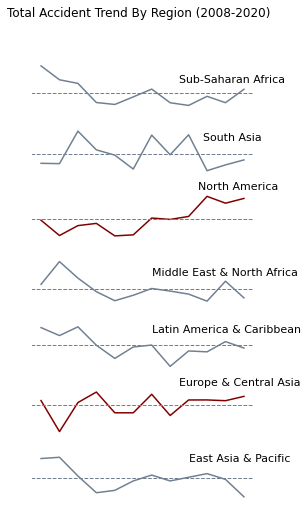

In [156]:
spark()

In [160]:
# Fleet age by Country
fleet_age = fleet_age[["countryName","countryCode","av_fleet_age","aircraft"]]
fleet_age.columns = ["Country Name","Country Code","Fleet Age","Fleet Size"]
fleet_age_country_av = pd.DataFrame(fleet_age.groupby("Country Code",as_index = False)["Fleet Age"].mean())
fleet_size_country_av = pd.DataFrame(fleet_age.groupby("Country Code",as_index = False)["Fleet Size"].mean())

# GDP per Capita
gdp_cap = gdp_cap[["Country Name","Country Code","Average (000s)"]]
gdp_cap.sort_values(by = "Average (000s)",ascending = False).head(10)

# Merge into one dataframe
mergeddf = gdp_cap.merge(fleet_age_country_av,on = "Country Code")
mergeddf = mergeddf.merge(fleet_size_country_av, on = "Country Code")
mergeddf2 = mergeddf.merge(state_combined,left_on = "Country Code",right_on = "State")

# Merge with world bank income category and set categories to numerical values
mergeddf2_combined = mergeddf2.merge(income_cat, how = 'left', on = "Country Name")
mergeddf2_combined["Income_cat"] = mergeddf2_combined['Income'].replace(['High','Upper Middle','Lower Middle','Lower'],[1,2,3,4])
mergeddf2_combined["Income_cat"].astype(float)

In [166]:
# Figure 17 - Accident Rate by Fleet Age, Fleet Size and Income per Capita

def bubble():
    fl = mergeddf2_combined["Fleet Age"]
    ar = np.log10(mergeddf2_combined["state_acc_thoudeps"])
    c = mergeddf2_combined["Income_cat"]
    size = mergeddf2_combined["Fleet Size"]*20
    fig, ax = plt.subplots(figsize = (14,8))
    ax.set_facecolor("White")
    z = np.polyfit(fl, ar, 1)
    p = np.poly1d(z)
        
    # Plot chart
    sc = ax.scatter(fl,ar,c = c,alpha = 0.6,s=size,cmap="viridis",edgecolors = "black",linewidth = 0.5)
    ax.plot(fl,p(fl),"slategrey",linestyle = "--",linewidth = 0.5,alpha = 1)          
    ax.set_title("Log Accident Rate by Fleet Age, Fleet Size and World Bank Income Category",fontsize = 16,pad = 20)
    ax.set_xlim(0,50)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines["left"].set_color("lightgrey")
    ax.spines["bottom"].set_color("lightgrey")
    ax.set_xlabel("Fleet Age(years)",fontsize =11)
    ax.set_ylabel("log(Accidents per 100,000 Flights))",fontsize = 11)
    ax.text(22.5,-0.5,"Bermuda",fontsize = 9)
    ax.text(14.5,-1.4,"Ireland",fontsize = 9)
    ax.text(39,-2.3,"Honduras",fontsize = 9)
    #ax.text(4.5,-1.95,"Brunei",fontsize = 9)
    ax.text(33.5,-0.12,"Sao Tome & Principe",fontsize = 9)
    ax.text(3.6,-2.8,"India",fontsize = 9)
    ax.text(11.5,-0.75,"DR Congo",fontsize = 9)
    #ax.text(35.8,-0.87,"N.Korea",fontsize = 9)
    
    
    labels = {'High: 12,536+':1,'Upper Middle: 4,046 - 12,535':2, 'Lower Middle: 1,036 - 4,045':3, 'Lower: <1035':4}
    legend1 = ax.legend(handles=sc.legend_elements(num=[1,2,3,4])[0], labels=labels.keys(), fontsize = 11,
                        facecolor = "white",frameon = False,title = "World Bank Income per Capita US$\n",loc = "upper left")
                       
    plt.setp(legend1.get_title(),fontsize=11)
    ax.add_artist(legend1)
    
    g = lambda s: np.sqrt(s/12)*10
    legend2 = ax.legend(*sc.legend_elements("sizes",num = 6, func = g,c = 'slategrey',alpha = 0.6),facecolor = "white",frameon = False, title = "Fleet Size",
             labelspacing = 4, loc = "upper right",handletextpad = 2)
    plt.setp(legend2.get_title(),fontsize=10)
    
    plt.show()

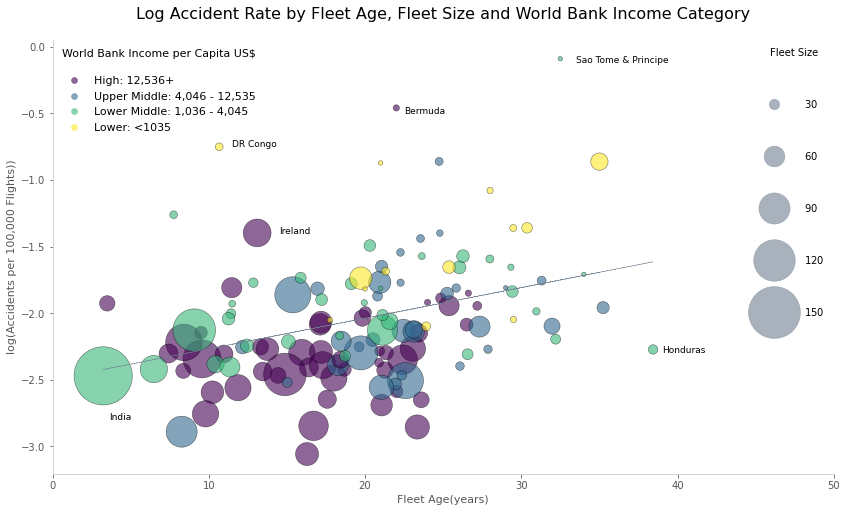

In [167]:
bubble()